<a href="https://colab.research.google.com/github/mahinuralam/notebooks/blob/main/FL_MNIST_CIFAR_10_RealAIGI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cifar-10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3649%2F46718%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240816%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240816T070648Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5fa87b5f48559859c95f789c67a58bde4f2794cdca99f655cc1ed21266b437412c277ffe183c60f47952a6ff0ed95db2f049e269447c81631eb996021f540cac4097d216b1cd2fd2a000ed0f765e1d201363e95c33e4cf212d1f7ee4e1ff206998592a572a3e6bb110db8f2ac0ded855496eac162a57fe18ea25314b9b4db64cacc0eaa7e4f94506b8f7c04a3b6932404892b0c122a19f9458a1ef9ce2ce5a1881e4892a092e30edd5d32b92a502b44f4e0575343e54fbabf85fdd327553960caadc1c376d7f1bdefe9f13c583ae7181679f8fe2dea08880a73971d2b47e55c09c780e0ae7da481c23fe48c751c0fa89193e33f4e7e38ce5e417ac031d78a2d2,mnistasjpg:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1272%2F2280%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240816%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240816T070648Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4ecaf175f58d005d870c0e4f735831049e4d7eeed3331eb3bd55388945ed5106464e38d443124523c9fc20bff4454c5b3f9bfa74389260c27625bd88d0142aea15b99aa341de0784f78e685327f9e74f51e1299e0f61a814712af869751d9d5379d6aa8e74449f12b2168471093c519181e1c07dc097218bab382d2be8cc88f35e1e297018d8924d4d2fcdf3d088ff289ac1ffd320206dcee197a33cef961dab2101b73a1819026f276d06364ee916cd1d20fcc780679546dad88cadf483735f12e9a3f4ce9f63adf1a64c5a6e459faa2197f148eeef6a23d07e59b4c5cf4b7cd461f4f0f3762c9ceb1b4e9ce05bfcccc9d18429616171964279519895ae9307,cifar10-pngs-in-folders:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F118250%2F283795%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240816%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240816T070648Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6aa55deba5c22afea1e4f52f7e65cedd39c82aa8b572d5786387f54cafdf073de0213830d3e91e54c699513c82cd7fe7f05275cd3907b545d9b1ae550a5852892f9cd0a8876ae259aaf2c30b3d010bf783e048d9c75d283ed9b1fb898dbfddf4bf649beb1c320e103215852b9270c4f6c434977623439405a492071f3b1f51e8f8a4e554681d8c1bbb031c117a939c21269b5f855f422d2f6bf7f856bb480cb0ee2971b72824d2fe7fd965df4f053f4dda102cc05ae628d87d50ad9def7c73fa32f83d1ed82e7006e23630e3f65b65895266f50a5e961d8f8b03bbec6bc7a8132e7d2c886cbf5afc28e0ad095a2d053d721002f63b6f798f74533e7ff1ed8239'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import random
import cv2
import os
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import expand_dims
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Lambda
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [ ]:
!pip install imutils
from imutils import paths

### Todo

create subset of clients

- increase comm rounds 300
- increase hidden units 400
- increase no of layers
- no of clients 20

In [ ]:
debug = 0

In [ ]:
def load(paths, verbose=-1):
    '''expects images for each class in seperate dir,
    e.g all digits in 0 class in the directory named 0 '''
    data = list()
    labels = list()
    # loop over the input images
    for (i, imgpath) in enumerate(paths):
        # load the image and extract the class labels
        im_gray = cv2.imread(imgpath , cv2.IMREAD_GRAYSCALE)
        image = np.array(im_gray).flatten() # cv2.imread(imgpath)
        # print(image.shape)
        label = imgpath.split(os.path.sep)[-2]
        # scale the image to [0, 1] and add to list
        data.append(image/255)
        labels.append(label)
        # show an update every `verbose` images
        if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
            print("[INFO] processed {}/{}".format(i + 1, len(paths)))
    # return a tuple of the data and labels

    return data, labels

def create_clients(image_list, label_list, num_clients=10, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as
                data shards - tuple of images and label lists.
        args:
            image_list: a list of numpy arrays of training images
            label_list:a list of binarized labels for each image
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1

    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    data = list(zip(image_list, label_list))
    random.shuffle(data)  # <- IID

    # sort data for non-iid
#     max_y = np.argmax(label_list, axis=-1)
#     sorted_zip = sorted(zip(max_y, label_list, image_list), key=lambda x: x[0])
#     data = [(x,y) for _,y,x in sorted_zip]

    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))}


def batch_data(data_shard, bs=32):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)


def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs


    if debug:
        print('global_count', global_count, 'local_count', local_count, 'bs', bs)

    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad


import time
from sklearn.metrics import accuracy_score
import tensorflow as tf

import time

# Initialize cumulative time tracker
cumulative_time = 0

def test_model(X_test, Y_test, model, comm_round):
    global cumulative_time  # Ensure we're modifying the global cumulative time variable

    # Start time measurement
    start_time = time.time()

    # Calculate loss and accuracy
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))

    # End time measurement
    end_time = time.time()

    # Calculate elapsed time for this round
    elapsed_time = end_time - start_time

    # Update cumulative time
    cumulative_time += elapsed_time

    # Print results with cumulative time
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {} | cumulative_time: {:.2f} seconds'.format(
        comm_round, acc, loss, cumulative_time))

    return acc, loss




In [ ]:
class SimpleMLP:
    @staticmethod
    def build(shape, classes):
        model = Sequential()
        model.add(Dense(200, input_shape=(shape,)))
        model.add(Activation("relu"))
        model.add(Dense(200))
        model.add(Activation("relu"))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

#     def build(shape, classes):
#         model = Sequential()
#         model.add(Input(shape=(shape[0], shape[1], shape[2])))
#         #model.add(Lambda(lambda x: expand_dims(x, axis=-1)))
#         model.add(Conv2D(filters=64, kernel_size=3, padding="same"))
#         model.add(Activation("relu"))
#         model.add(Conv2D(filters=64, kernel_size=3, padding="same"))
#         model.add(Activation("relu"))
#         model.add(MaxPooling2D())
#         model.add(Conv2D(filters=128, kernel_size=3, padding="same"))
#         model.add(Activation("relu"))
#         model.add(Conv2D(filters=128, kernel_size=3, padding="same"))
#         model.add(Activation("relu"))
#         model.add(MaxPooling2D())
#         model.add(Activation("relu"))
#         model.add(Conv2D(filters=256, kernel_size=3, padding="same"))
#         model.add(Activation("relu"))
#         model.add(Conv2D(filters=256, kernel_size=3, padding="same"))
#         model.add(Activation("relu"))
#         model.add(MaxPooling2D())
#         model.add(Activation("relu"))
#         model.add(Conv2D(filters=512, kernel_size=3, padding="same"))
#         model.add(Activation("relu"))
#         model.add(Conv2D(filters=512, kernel_size=3, padding="same"))
#         model.add(Activation("relu"))
#         model.add(MaxPooling2D())
#         model.add(Flatten())
#         model.add(Dense(32))
#         model.add(Dense(classes))
#         model.add(Activation("softmax"))
#         return model



import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

def attention_module(inputs):
    # Squeeze and Excitation block
    x = layers.GlobalAveragePooling2D()(inputs)
    x = layers.Dense(units=inputs.shape[-1] // 16, activation='relu')(x)
    x = layers.Dense(units=inputs.shape[-1], activation='sigmoid')(x)
    x = layers.Multiply()([inputs, x])
    return x


def spatial_attention(input_feature):
    kernel_size = 7
    avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
    max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
    concat = tf.concat([avg_pool, max_pool], axis=3)
    attention_map = layers.Conv2D(filters=1, kernel_size=kernel_size, strides=1, padding='same', activation='sigmoid')(concat)
    return input_feature * attention_map


def channel_attention(input_feature, ratio=8):
    channel = input_feature.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(input_feature)
    max_pool = layers.GlobalMaxPooling2D()(input_feature)
    dense1 = layers.Dense(channel // ratio, activation='relu')
    dense2 = layers.Dense(channel, activation='sigmoid')

    avg_out = dense2(dense1(avg_pool))
    max_out = dense2(dense1(max_pool))

    attention = avg_out + max_out
    return input_feature * layers.Reshape([1, 1, channel])(attention)


def MACNN(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # First Convolutional Block
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # Add Attention Module
    x = attention_module(x)
    x = spatial_attention(x)

    # Second Convolutional Block
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # Add Attention Module
    x = attention_module(x)
    x = channel_attention(x)

    # Third Convolutional Block
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # Dense Layers
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model


In [ ]:
#declear path to your mnist data folder
img_path = '../input/mnistasjpg/trainingSet/trainingSet' #'../input/cifar10-pngs-in-folders/cifar10/test'  # <-- test dataset #'../input/mnistasjpg/trainingSample/trainingSample' # <-- smaller dataset

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=10000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

[INFO] processed 10000/42000
[INFO] processed 20000/42000
[INFO] processed 30000/42000
[INFO] processed 40000/42000


In [ ]:
#declear path to your RealAIGI data folder
img_path = '../input/RealAIGI'

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=10000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

In [ ]:
#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(image_list,
                                                    label_list,
                                                    test_size=0.1,
                                                    random_state=42)

### IID

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(37800, 4200, 37800, 4200)

In [ ]:
#create clients
clients = create_clients(X_train, y_train, num_clients=100, initial='client')

In [ ]:
# client_names = ['{}_{}'.format('client', i+1) for i in range(100)]
# s = clients['client_1'][0][1]*0
# for c in client_names:
#     sum = clients[c][0][1]
#     for i in range(1,378):
#         sum = sum + clients[c][i][1]

#     s = s + sum/378
# s

In [ ]:
#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)

#process and batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [ ]:
lr = 0.01
# lr = 0.0001
loss = 'binary_crossentropy'
comms_round = 300
loss='categorical_crossentropy'
metrics = ['accuracy']
optimizer = SGD(lr=lr,
                decay=lr / comms_round,
                momentum=0.9
               )

In [ ]:
#initialize global model

build_shape = 784 #(28, 28, 3)  # 1024 <- CIFAR-10    # 784 # for MNIST # 1024 <- RealAIGI

#smlp_global = SimpleMLP()
smlp_global = MACNN()
global_model = smlp_global.build(build_shape, 10)
global_acc_list = []
global_loss_list = []

In [ ]:
#commence global training loop
for comm_round in range(comms_round):

    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    all_client_names = list(clients_batched.keys())

    client_names = random.sample(all_client_names, k=10)
    # print(client_names, len(client_names))
    random.shuffle(client_names)

#     if debug:
#         # print('all_client_names', all_client_names)
#         print('client_names', client_names, len(client_names))


    #loop through each client and create new local model
    for client in client_names:
        #smlp_local = SimpleMLP()
        smlp_global = MACNN()
        local_model = smlp_local.build(build_shape, 10)
        local_model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=metrics)

        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=1, verbose=0)

        #scale the model weights and add to list
        scaling_factor = 0.1 # weight_scalling_factor(clients_batched, client)
        # print('scaling_factor', scaling_factor)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)

        #clear session to free memory after each communication round
        K.clear_session()

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)

    #update global model
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)
        global_acc_list.append(global_acc)
        global_loss_list.append(global_loss)

comm_round: 0 | global_acc: 47.238% | global_loss: 2.26708984375 | cumulative_time: 0.23 seconds
comm_round: 1 | global_acc: 62.381% | global_loss: 2.212703227996826 | cumulative_time: 0.38 seconds
comm_round: 2 | global_acc: 72.381% | global_loss: 2.1335561275482178 | cumulative_time: 0.53 seconds
comm_round: 3 | global_acc: 75.976% | global_loss: 2.0392730236053467 | cumulative_time: 0.68 seconds
comm_round: 4 | global_acc: 79.571% | global_loss: 1.9596021175384521 | cumulative_time: 0.83 seconds
comm_round: 5 | global_acc: 81.310% | global_loss: 1.8976680040359497 | cumulative_time: 0.98 seconds
comm_round: 6 | global_acc: 82.238% | global_loss: 1.8540202379226685 | cumulative_time: 1.15 seconds
comm_round: 7 | global_acc: 82.667% | global_loss: 1.818867802619934 | cumulative_time: 1.29 seconds
comm_round: 8 | global_acc: 83.905% | global_loss: 1.79023277759552 | cumulative_time: 1.44 seconds
comm_round: 9 | global_acc: 84.643% | global_loss: 1.7705410718917847 | cumulative_time: 1.

IID | total comm rounds 300


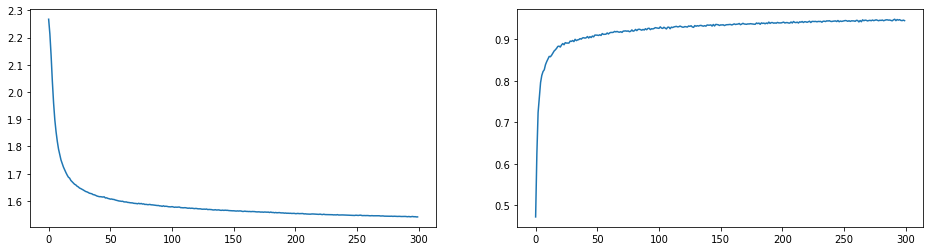

In [ ]:
# IID
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(list(range(0,len(global_loss_list))), global_loss_list)
plt.subplot(122)
plt.plot(list(range(0,len(global_acc_list))), global_acc_list)
print('IID | total comm rounds', len(global_acc_list))

In [ ]:
iid_df = pd.DataFrame(list(zip(global_acc_list, global_loss_list)), columns =['global_acc_list', 'global_loss_list'])
iid_df.to_csv('MNIST_IID.csv',index=False)

### Non-IID

In [ ]:
def create_clients(image_list, label_list, num_clients=100, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as
                data shards - tuple of images and label lists.
        args:
            image_list: a list of numpy arrays of training images
            label_list:a list of binarized labels for each image
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1

    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    # data = list(zip(image_list, label_list))
    # random.shuffle(data)  # <- IID

    # sort data for non-iid
    max_y = np.argmax(label_list, axis=-1)
    sorted_zip = sorted(zip(max_y, label_list, image_list), key=lambda x: x[0])
    data = [(x,y) for _,y,x in sorted_zip]

    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))}

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(37800, 4200, 37800, 4200)

In [ ]:
#create clients
clients = create_clients(X_train, y_train, num_clients=100, initial='client')

In [ ]:
#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)

#process and batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [ ]:
lr = 0.01
# lr = 0.0001
comms_round = 300
#loss='categorical_crossentropy'
loss = 'binary_crossentropy'
metrics = ['accuracy']
optimizer = SGD(lr=lr,
                decay=lr / comms_round,
                momentum=0.9
               )

In [ ]:
#initialize global model

build_shape = 784 #(32, 32, 3)  # 1024 <- CIFAR-10    # 784 # for MNIST # 1024 <- RealAIGI

#smlp_global = SimpleMLP()
smlp_global = MACNN()
global_model = smlp_global.build(build_shape, 10)
global_acc_list = []
global_loss_list = []

In [ ]:
#commence global training loop
for comm_round in range(comms_round):

    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    all_client_names = list(clients_batched.keys())

    client_names = random.sample(all_client_names, k=10)
    random.shuffle(client_names)
    if debug:
        # print('all_client_names', all_client_names)
        print('client_names', client_names)

    #loop through each client and create new local model
    for client in client_names:
        #smlp_local = SimpleMLP()
        smlp_global = MACNN()
        local_model = smlp_local.build(build_shape, 10)
        local_model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=metrics)

        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=1, verbose=0)

        #scale the model weights and add to list
        scaling_factor = 0.1 # weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)

        #clear session to free memory after each communication round
        K.clear_session()

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)

    #update global model
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)
        global_acc_list.append(global_acc)
        global_loss_list.append(global_loss)

comm_round: 0 | global_acc: 9.190% | global_loss: 2.302341938018799 | cumulative_time: 45.18 seconds
comm_round: 1 | global_acc: 14.024% | global_loss: 2.268569231033325 | cumulative_time: 45.33 seconds
comm_round: 2 | global_acc: 25.048% | global_loss: 2.233290910720825 | cumulative_time: 45.48 seconds
comm_round: 3 | global_acc: 25.786% | global_loss: 2.2300169467926025 | cumulative_time: 45.63 seconds
comm_round: 4 | global_acc: 35.048% | global_loss: 2.1968514919281006 | cumulative_time: 45.78 seconds
comm_round: 5 | global_acc: 21.929% | global_loss: 2.219078302383423 | cumulative_time: 45.93 seconds
comm_round: 6 | global_acc: 45.286% | global_loss: 2.1506009101867676 | cumulative_time: 46.08 seconds
comm_round: 7 | global_acc: 33.381% | global_loss: 2.1457102298736572 | cumulative_time: 46.24 seconds
comm_round: 8 | global_acc: 33.476% | global_loss: 2.1845316886901855 | cumulative_time: 46.39 seconds
comm_round: 9 | global_acc: 24.571% | global_loss: 2.181304931640625 | cumulat

Non-IID | total comm rounds 300


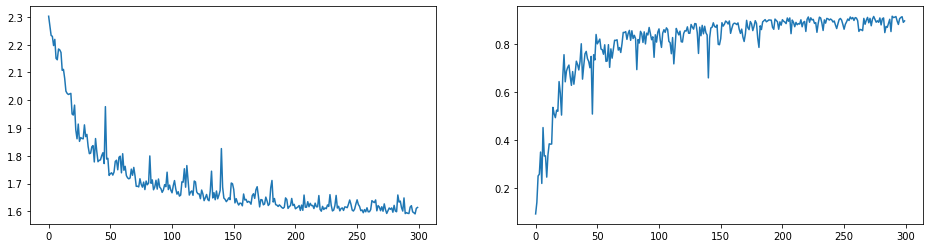

In [ ]:
# Non-IID
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(list(range(0,len(global_loss_list))), global_loss_list)
plt.subplot(122)
plt.plot(list(range(0,len(global_acc_list))), global_acc_list)
print('Non-IID | total comm rounds', len(global_acc_list))

In [ ]:
noniid_df = pd.DataFrame(list(zip(global_acc_list, global_loss_list)), columns =['global_acc_list', 'global_loss_list'])
noniid_df.to_csv('CIFAR-10_Non-IID.csv',index=False)